# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **

> This type of supervised learning problem is a **CLASSIFICATION** problem. The outcomes that we are after have discrete labels, essentially allowing us to assign a classification label as to whether a student graduates or not. We can then predict for a future student whether they are likely to graduate, so help can come in a timely manner.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [19]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

from IPython.display import Image
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"



Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
from __future__ import division
# TODO: Calculate number of students
n_students = len(student_data)

# TODO: Calculate number of features
n_features = len(student_data.keys()) - 1 #because one column is for the labels we assign

# TODO: Calculate passing students
n_passed = len(student_data[student_data['passed'] == 'yes'])

# TODO: Calculate failing students
n_failed = len(student_data[student_data['passed'] == 'no'])

# TODO: Calculate graduation rate
grad_rate = n_passed/n_students*100.

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [3]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [4]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))
len(set(X_all.absences))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


34

### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [26]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size = num_train, random_state=143)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **

1. <font color='green'>**Random Forest**</font> 

    1.1 **Application**
    
      Decision trees have been used to diagnose [ovarian cancer in women](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC521504/). Data from the spectral profiles of serum proteins from patients who have either ovarian cancer, benign pelvic diseases, and who were otherwise healthy, were used in the analysis. A decision tree was then built using five protein peaks as features, which then resulted in an accuracy of better than $\sim$ 80%.
      
    1.2 **Strengths**
    
      I think the most prominent advantage of a decision tree classifier is that is quite simple to understand and read, in the sense that one is quite familiar with making trees in the decisions one makes in everyday life, not requiring any technical knowledge in machine learning. It needs little data preparation (e.g. regularization, and normalization), as one simply splits the parameter space depending on the questions being asked. It also performs well with large datasets, and it's predictive power can be validated using statistical tests. This classifier can also handle both numeric and categorical data.
      
    1.3 **Weaknesses**
    
      As the number of features increase, decision trees are prone to become too large, complicated trees that do not generalize the data very well [over-fitting]. These tend to be sensitive to small perturtabtions in the data. Slightly changing the splits can easily result into an entirely different tree, and thus different prediction, potentially. Decision trees also would not perfom well in relatively small training sets, and would create biased trees when one class dominates over the other/others.
      
    1.4  **Why**
    
      In terms of the attributes of the features, most of the features are either categorical or of the yes-no (binary) type. Furthermore, most these features take on a small number of possible values (except for "absences" feature, having 34 possible values). The categorical nature of most of the features bears resemblance to the classification problem for the Titanic, where a decision tree was used to make classifications.  
      
      It seems reasonable that we can at least try to set up a decision tree as we ask various questions about our sample and identify which features are good predictors of student success. For these reasons, my gut tells me that a decison tree might be worthwhile to experiment with.
      
      But, unlike the Titanic dataset, this one is quite small (less than half of the Titanic set), and has a much larger set of features. Splitting into training and validation sets make it even smaller. The two datasets have roughly a similar imbalace between classes (i.e. $\sim$ 30% survival rate vs $\sim$32% failure rate), as well. Hence, given these problematic features on the dataset, the decision tree might not perform as well as I would hope. But we'll see. These concerns also lead me to try an ensemble classifier below.     
<br><br>
2. <font color='green'>**Ensemble Methods: AdaBoost**</font> 

    2.1 **Application**
    
    Since Adaboost is used in conjuction with other classifiers, such as decision trees to improve performance, many of its applications involve boosting on decision trees. One prominent example is the Viola-Jones face detector, which which ["selects a small number of critical visual features from a larger set and yields extremely efficient classifiers"](http://www.cs.utexas.edu/~grauman/courses/spring2007/395T/papers/viola_cvpr2001.pdf).
    
    2.2 **Strengths**
    
    It is fast because of the exponetial wighting, and can be combined with any learning algorithm.
    
    2.3 **Weaknesses**
    
    Adaboost can be sensitive to noisy data and outliers. And would tend to overfit if the weak learners are over-fitting at the fundamental level. 
    
    2.3 **Why?**
    
    Since I am using a DT classifier, I would also like to check if and how ada-boosting the decision tree would result in a better result/prediction.
<br><br>
    
3. <font color='green'>**Support Vector Machines**</font> 
 
 3.1 **Application**
 
 Used in [credit risk analysis](http://www.svms.org/finance/Huang-etal2004.pdf). They have also been used in [image recognition, speech recognition, text categorization, face detection](http://ieeexplore.ieee.org/xpl/articleDetails.jsp?reload=true&arnumber=6914146).
 
 3.2 **Strengths**
 
  SVMs are effective in high dimensional spaces, and even in casees where the number of examples is less than the number of features. Also, it doesn't get trapped in a local minimum, since the problem of maximizing the margin is fundamentally [convex](https://www.youtube.com/watch?v=_PwhiWxHK8o). The ability to use kernels to transform the data towards linear separability makes SVMs versatile.
 
 3.3 **Weaknesses**
 
  The primary danger of using SVMs is the potential of over-doing the kernel resulting to an overfit decision boundary. In cases where [the number of features is much greater than the number of samples, the SVMs are likely to perform poorly](http://scikit-learn.org/stable/modules/svm.html).
 
 3.4 **Why?**

  My concerns above regarding how small the dataset might become, would lead me to try SVMs, as they tend to work relatively well even with relatively smaller training size and a large number of features (which in this case is 48). Another important factor in my considering SVMs is the theoretical guarantee that the classifier does not have the risk of being trapped in a local minima.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [6]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [30]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

# TODO: Initialize the three models
clfs = [DecisionTreeClassifier(random_state=143), AdaBoostClassifier(random_state=143), SVC(random_state=143)]
sizes = [100, 200, 300]
for clf in clfs:
    for size in sizes:
        train_predict(clf, X_train[:size], y_train[:size], X_test, y_test)

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0011 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.6885.
Training a DecisionTreeClassifier using a training set size of 200. . .
Trained model in 0.0014 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.7576.
Training a DecisionTreeClassifier using a training set size of 300. . .
Trained model in 0.0019 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.7424.
Training a AdaBoostClassifier using a training set size of 100. . .
Trained model in 0.1023 seconds
Made predictions in 0.0052 seconds.
F1 score for training set: 0.9559.
Made predictions in 0.0051 seconds.
F1 score for test set: 0.7023.
Training a AdaBoostClassifier using 

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - Decision Tree Classifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0010 s         |      0.0002 s          |   1.0            |    0.6885       |
| 200               |        0.0013 s         |      0.0002 s          |   1.0            |    0.7576       |
| 300               |        0.0018 s         |      0.0002 s          |   1.0            |    0.7424       |

** Classifer 2 - AdaBoosted Decision Tree Classifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0984 s         |      0.0054 s          |   0.9559         |     0.7826      |
| 200               |        0.1005 s         |      0.0053 s          |   0.8841         |     0.7826      |
| 300               |        0.1017 s         |      0.0049 s          |   0.8592         |     0.8108      |

** Classifer 3 - SVM Classifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0114 s         |      0.0011 s          |   0.8889         |     0.8258      |
| 200               |        0.0040 s         |      0.0012 s          |   0.8733         |     0.8421      |
| 300               |        0.0061 s         |      0.0014 s          |   0.8770         |     0.8344      |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

> **Answer: **

>Given the small size of the dataset, the training and prediction speeds, and most importantly the performance under *default* parameters, the <font color='green'>**SVM classifier**</font> is the algorithm of choice, amonst the three.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

> **Answer: **

> Support Vector Machines (SVMs) are a type of classifiers, which in essence, will find the separating surface between(among) classes by maximizing its gap(margin) to the closest point from either (or any of the) class(es).  The coolest thing about SVM classifiers is that these are theoretically guaranteed to find the optimum margin, in a global sense. Based on the results above, the classifier is relatively fast and has shown to perform quite well. They are also versatile. We are allowed us to use an arsenal tricks [called the kernel trick] to solve non-linearly separable problems. To elaborate on the kernel trick, consider the cartoon below. Panel B, plots the data in real space. No matter what one does, no straight line can be drawn to efficiently and correctly separate the <font color='red'>**red **</font>  and <font color='green'>**green **</font> points. The kernel trick provides a way around this non-separability. The solution to the problem is to transform the data into $r^2 = x^2 + y^2$ (i.e. their radial distances from the origin), and assign this as the new $x-$axis, while keeping the $y-$axis the same. As illustrated in **C**, the data is transformed such that the <font color='red'>**red points**</font> points cluster at smaller $x^2 + y^2$ values than the <font color='green'>**green**</font> points. As a result, the two classes become distinctly separable. 

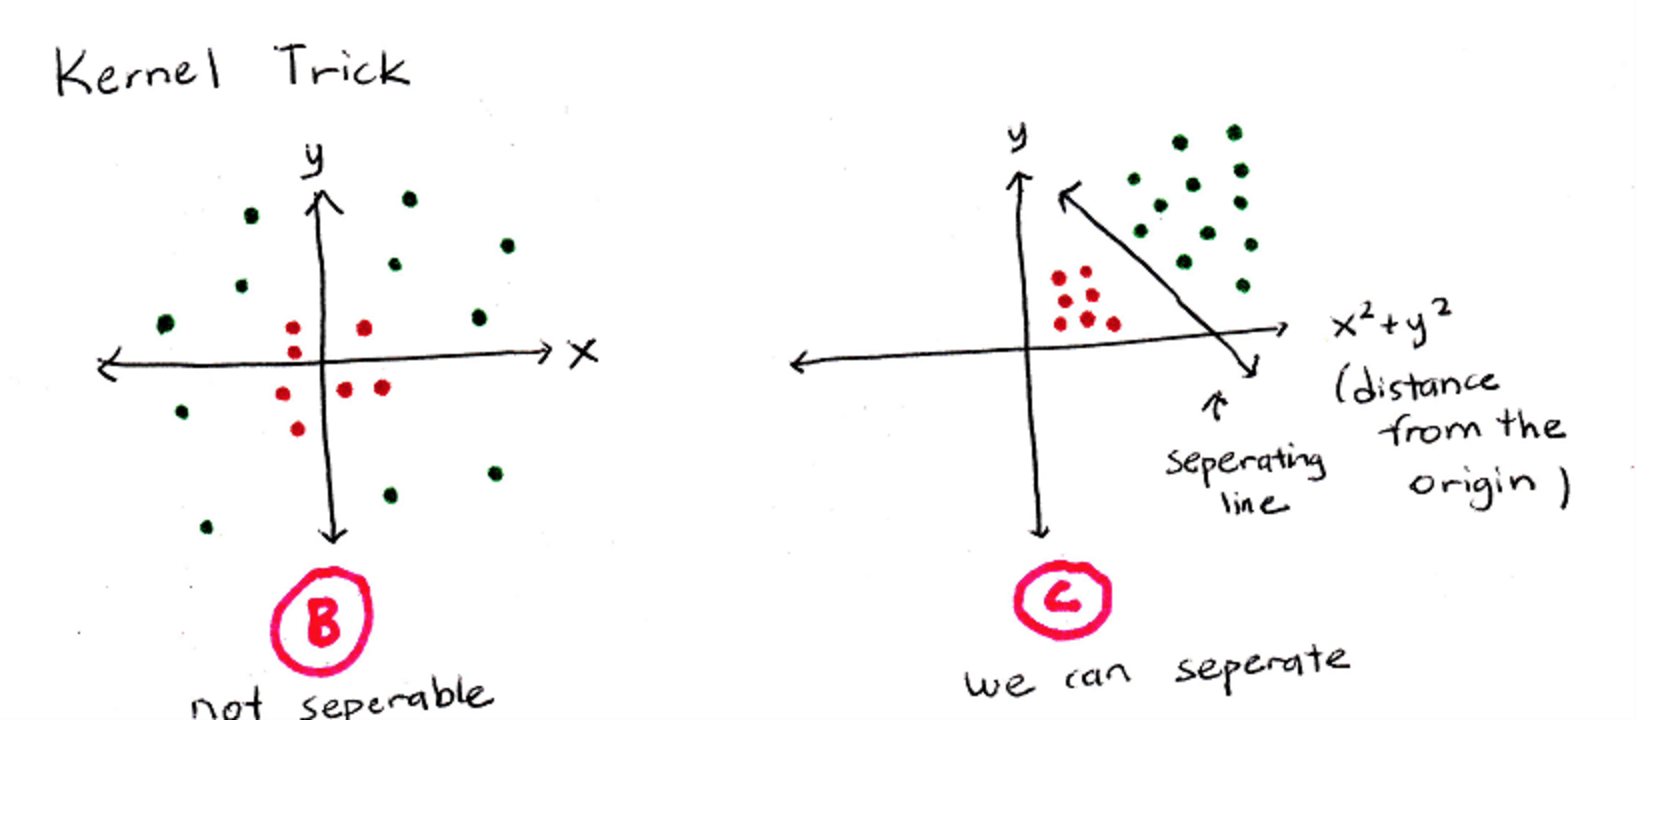

In [21]:
Image(filename='/Users/gmsardane/Desktop/SVM.png')

> For this paticular problem, we are discriminating between the students who successfully graduate from those who don't, so that timely help can be offered. Due to the small size of the dataset, and the large number of features, SVMs are appropriate for a classification problem such as this.  We train the model using 75% of the (randomized) data; the remaining (randomized) set is used for making predictions and testing. Predictions are made as these testing points are then mapped into the same (training) space where the gap between the two categories is the widest possible. A label is assigned to the new example depending on which side of the dividing surface they fall on. 

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [28]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune

parameters = {'C': [0.1, 1, 10, 1e2, 1e3],
              'gamma': [0.0001, 0.001, 0.005, 0.01, 0.1], 'kernel':['linear', 'rbf', 'poly', 'sigmoid']}


# TODO: Initialize the classifier
clf = SVC(random_state=143)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
cv = StratifiedShuffleSplit(y_train, n_iter=10, test_size=0.24, random_state=143)
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=f1_scorer,  cv=cv)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)
#
## Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Made predictions in 0.0053 seconds.
Tuned model has a training F1 score of 0.9754.
Made predictions in 0.0018 seconds.
Tuned model has a testing F1 score of 0.8428.


In [29]:
clf

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=143, shrinking=True,
  tol=0.001, verbose=False)

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

> **Answer: **
> The final $F_{1, train} = 0.8110$, while the score $F_{1, test} = 0.8571$. For the training size of 300, although the training score decreased by about 6%, the testing score improved to $ > 0.85$, which is pretty good given the sample size for training have. 

    >> Update: Using cv = StratifiedShuffleSplit() gives slightly lower $F_{1,test} \sim 0.843$. But a significantly larger  $F_{1,train} \sim 0.975$. The previous results were obtained using a cv = 10. This demonstrates the intrinsic bias in the data due to the imbalance in the classes!


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.